In [1]:
!pip install Seaborn
!pip install missingno

In [2]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import bs4
from urllib.request import urlopen
import lxml.html
import requests
import matplotlib.pyplot as plt
import time
import seaborn as sns
import missingno as msno
plt.style.use('seaborn-bright')

In [3]:
def db_delete():
    import sqlite3
    from pandas.io import sql
    import os
    with sqlite3.connect(os.path.join('.','sqliteDB')) as con: # sqlite DB 파일이 존재하지 않는 경우 파일생성
        try:
            cur = con.cursor()
            sql = 'DELETE FROM ARTICLE'
            cur.execute(sql)
        except Exception as e:
            print(str(e))

In [4]:
def db_save(df):    
    import sqlite3
    from pandas.io import sql
    import os
    with sqlite3.connect(os.path.join('.','sqliteDB')) as con: # sqlite DB 파일이 존재하지 않는 경우 파일생성
        try:
            df.to_sql(name = 'ARTICLE'.upper(), con = con, index = False, if_exists='replace') 
            #if_exists : {'fail', 'replace', 'append'} default : fail
        except Exception as e:
            print(str(e))
        print(len(df),' 저장완료')

In [5]:
def db_select():
    import sqlite3
    from pandas.io import sql
    import os
    with sqlite3.connect(os.path.join('.','sqliteDB')) as con: # sqlite DB 파일이 존재하지 않는 경우 파일생성
        try:
            query = 'SELECT * FROM ARTICLE'
            ARTICLE = pd.read_sql(query, con = con)
        except Exception as e:
            print(str(e)) 
        return ARTICLE

In [6]:
# 1월 크롤링 코드
df_list=[]
for i in list(range(174,198)):
    baseurl='https://gnews.gg.go.kr/briefing/brief_gongbo.do?page={}&BS_CODE=s017&period_1=&period_2=&search=0&keyword=&subject_Code=BO01'\
    .format(str(i))
    response = requests.get(baseurl)
    root = lxml.html.fromstring(response.content)
    for a in root.xpath('//*[@id="chk-table"]/tbody/tr'):
        title = a.xpath('td[2]/a')[0]
        url=title.get('href')
        dept = a.xpath('td[3]')[0]
        reg_date = a.xpath('td[5]')[0]
        view = a.xpath('td[6]')[0]
        df = pd.DataFrame({
            'url':['https://gnews.gg.go.kr'+url],
            'title':[title.text],
            'dept':[dept.text],
            'reg_date':[reg_date.text.strip()],
            'view':[view.text]
        })
        df_list.append(df)
    if df_list:   
        df_1 = pd.concat(df_list)
#         db_save(df_1)
df_1.to_excel('1월 데이터.xlsx',index = False)


KeyboardInterrupt: 

In [37]:
# 2월 크롤링 코드
def crawling(start_page,end_page):
    url = [] # url 받는 리스트
    title = [] # title 받는 리스트
    dept = []  # deoartment 받는 리스트
    reg_date = [] # register date 받는 리스트
    view = [] # 조회수 받는 리스트
    df_list=[] # dataframe 받는 리스트
    sleep_time = 0
    for i in range(start_page,end_page):    
        ad = 'https://gnews.gg.go.kr/briefing/brief_gongbo.do?page={}&BS_CODE=s017&period_1=&period_2=&search=0&keyword=&subject_Code=BO01'\
        .format(str(i))
        response = requests.get(ad)
        root = lxml.html.fromstring(response.content)
        if (sleep_time % 10 == 0) & (sleep_time !=0): # ip 막히지 않게 잠깐 쉰다. 10페이지당 한 번
            time.sleep(5)
            print('sleep..')
        
        for t in root.xpath('//*[@id="chk-table"]/tbody/tr'):
            a = t.xpath('td[2]/a')[0] 
            url = 'https://gnews.gg.go.kr'+a.get('href') # url
            dep = t.xpath('td[3]')[0] # 부서
            date = t.xpath('td[5]')[0] # 날짜
            view =  t.xpath('td[6]')[0] # 조회수
            
            df_list.append(
                pd.DataFrame({
 
                  'url' : [url],
                 'title' : [a.text], # 제목
                 'dept'  :  [dep.text],
                 'reg_date' : [date.text.strip()],
                 'view' : [view.text],    
            })
            )
#         if df_list:   
#             df_sv = pd.concat(df_list)
#             db_save(df_sv) # db 저장
        
        
        sleep_time+=1
    
    df_10 = pd.concat(df_list)
    return df_10.reset_index(drop=True)
feb = crawling(140,174)# 140~173 -> 2월 데이터
feb.to_excel('2월 데이터.xlsx',index=False)

sleep..
sleep..
sleep..


In [38]:
# 3월 크롤링코드
def crawling(start_page,end_page):
    url = []
    title = []
    dept = []
    reg_date = []
    number = []
    df_list=[]
    for i in range(start_page,end_page):    
        ad = 'https://gnews.gg.go.kr/briefing/brief_gongbo.do?page={}&BS_CODE=s017&period_1=&period_2=&search=0&keyword=&subject_Code=BO01'\
        .format(str(i))
        response = requests.get(ad)
        root = lxml.html.fromstring(response.content)
        
        for t in root.xpath('//*[@id="chk-table"]/tbody/tr'):
            a = t.xpath('td[2]/a')[0] 
            url = 'https://gnews.gg.go.kr'+a.get('href')
            dep = t.xpath('td[3]')[0]
            date = t.xpath('td[5]')[0]
            view =  t.xpath('td[6]')[0]
            df_list.append(
                pd.DataFrame({
 
                  'url' : [url],
                 'title' : [a.text],
                 'dept'  :  [dep.text],
                 'reg_date' : [date.text.strip()],
                 'view' : [view.text],    
            })
            )
        if df_list:   
            df_sv = pd.concat(df_list)
            #db_save(df_sv)
    
    df_10 = pd.concat(df_list)
    return df_10.reset_index(drop=True)
x = crawling(108,140)
x.to_excel('3월 데이터.xlsx',index=False)

In [39]:
title=[]
url=[]
dep=[]
date=[]
views=[]
df_april=[]
df_10=[]
page=2
endpage=33
max_page = 0
while(True):
    df_april = []
    response=requests.get('https://gnews.gg.go.kr/briefing/brief_gongbo.do?page={}&BS_CODE=s017&period_1=2020-04-01&period_2=2020-04-30&search=6&keyword=&subject_Code=BO01'\
                         .format(page))
    root = lxml.html.fromstring(response.content)
    
    for article in root.xpath('//*[@id="chk-table"]/tbody'):
        for a in article.xpath('tr/td[2]/a'):
            url.append('https://gnews.gg.go.kr/'+a.get('href'))
            title.append(a.text)
        for a in article.xpath('tr/td[3]'):
            dep.append(a.text)
        for a in article.xpath('tr/td[5]'):
            date.append(a.text)
        for a in article.xpath('tr/td[6]'):
            views.append(a.text)
    df_article=pd.DataFrame({
        'url':url,
        'title':title,
        'dept':dep,
        'reg_date':date,
        'number':views
    })
    
    df_april.append(df_article) 
        
    if df_april:   
        df_10 = pd.concat(df_april)
        db_save(df_10)

    page=page+1
    if page==endpage:
        break
        
df_10.to_excel('4월 데이터.xlsx',index=False)        
        
        

10  저장완료
20  저장완료
30  저장완료
40  저장완료
50  저장완료
60  저장완료
70  저장완료
80  저장완료
90  저장완료
100  저장완료
110  저장완료
120  저장완료
130  저장완료
140  저장완료
150  저장완료
160  저장완료
170  저장완료
180  저장완료
190  저장완료
200  저장완료
210  저장완료
220  저장완료
230  저장완료
240  저장완료
250  저장완료
260  저장완료
270  저장완료
280  저장완료
290  저장완료
300  저장완료
310  저장완료


In [40]:
# 5월 크롤링코드
page = 45
max_page = 75
#dt = '20200630'
while(True):
    df_list = []
    response = requests.get('https://gnews.gg.go.kr/briefing/brief_gongbo.do?page={}&BS_CODE=s017&period_1=&period_2=&search=0&keyword=&subject_Code=BO01'\
                            .format(page))
    root = lxml.html.fromstring(response.content)
    for tr in root.xpath('//*[@id="chk-table"]/tbody/tr'):
            a = tr.xpath('td[2]/a')[0]
            url = a.get('href')
            dept = tr.xpath('td[3]')[0]
            reg_date = tr.xpath('td[5]')[0]
            view = tr.xpath('td[6]')[0]
            
        #print(a.text)
        
            df = pd.DataFrame({
                 'url' : ['https://gnews.gg.go.kr'+url],
                 'title':[a.text],
                 'dept':[dept.text],
                 'reg_date':[reg_date.text.strip()],
                 'view':[view.text]
                              })
            df_list.append(df)

        
    df_10 = pd.concat(df_list)
    db_save(df_10)

#     if df_list:
#         df_10 = pd.concat(df_list) #인덱스 리셋
#         db_save(df_10)

    if  page >= max_page:
        break;
    else:
        page = page + 1

df_10.to_excel('5월 데이터.xlsx', index = False)

10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료


In [41]:
# 6월 크롤링코드
page = 10  # 시작 페이지
end_page = 45 

while(True):
    df_list = []
    response = requests.get('https://gnews.gg.go.kr/briefing/brief_gongbo.do?page={}&BS_CODE=s017&period_1=&period_2=&search=0&keyword=&subject_Code=BO01'\
                            .format(page))
    root = lxml.html.fromstring(response.content)
    for tr in root.xpath('//*[@id="chk-table"]/tbody/tr'):
            a = tr.xpath('td[2]/a')[0] 
            url = ('https://gnews.gg.go.kr/' + a.get('href'))
            dep = tr.xpath('td[3]')[0]
            date = tr.xpath('td[5]')[0]
            view =  tr.xpath('td[6]')[0]
            df_list.append(
                pd.DataFrame({
 
                 'url' : [url],
                 'title' : [a.text],
                 'dept'  :  [dep.text],
                 'reg_date' : [date.text.strip()],
                 'view' : [view.text],    
            })
            )
    
    df_10 = pd.concat(df_list)
    
    db_save(df_10)
    

    if  page >= end_page:
        break;
    else:
        page = page + 1
df_10.to_excel('6월 데이터.xlsx', index = False)    

10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료
10  저장완료


In [7]:
data = pd.DataFrame()
for i in range(1,7):
    df = pd.read_excel('{}월 데이터.xlsx'.format(i))
    data = pd.concat([data,df])
data.head()

,url,title,dept,reg_date,view,number
0,https://gnews.gg.go.kr/briefing/brief_gongbo_v...,"경기도 공정특사경, 화물자동차 유가보조금 부정수급 ‘철퇴’",공정특별사법경찰단,2020.02.03,239.0,NaN
1,https://gnews.gg.go.kr/briefing/brief_gongbo_v...,‘기술창업 성공신화’ 경기도에서 이루자‥사업화 자금 최대 3천800만원까지,창업지원과,2020.02.03,213.0,NaN
2,https://gnews.gg.go.kr/briefing/brief_gongbo_v...,"도, 특화기술 갖춘 소공인의 경쟁력 강화 돕는다‥제품개발부터 마케팅까지",소상공인과,2020.02.03,209.0,NaN
3,https://gnews.gg.go.kr/briefing/brief_gongbo_v...,경기도 신종 코로나바이러스감염증 현황(2020.2.2. 17시10분),감염병관리과,2020.02.02,836.0,NaN
4,https://gnews.gg.go.kr/briefing/brief_gongbo_v...,경기도 신종 코로나바이러스감염증 현황(2020.2.2. 10시30분),감염병관리과,2020.02.02,1518.0,NaN


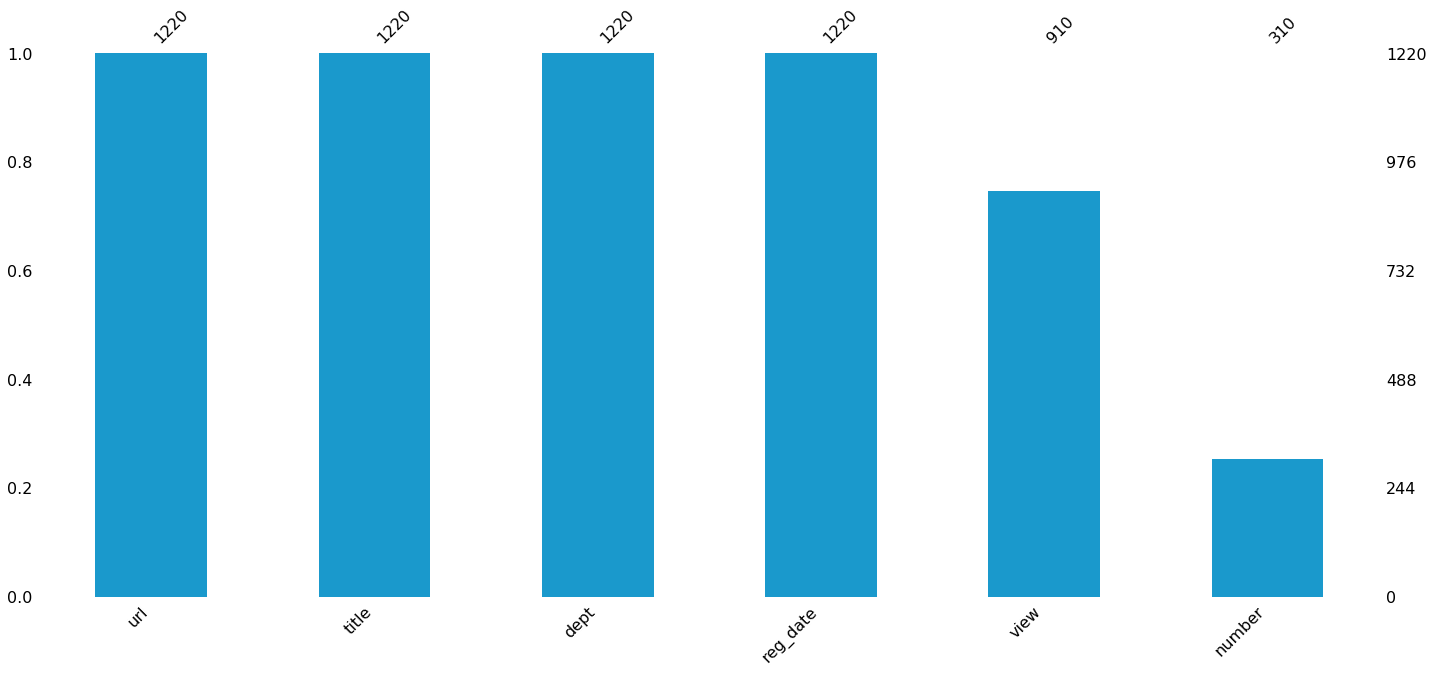

In [8]:
msno.bar(data,color=(0.1, 0.6, 0.8))

In [9]:
data['reg_date'] = pd.to_datetime(data['reg_date']) # datetime형식으로 변환
data['month'] = data['reg_date'].dt.month # 달만 추출

In [10]:
drop_idx = data[data['month'] == 7].index
data.drop(drop_idx,axis=0,inplace=True) # 7월 행 삭제

In [11]:
import os
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

def set_font(font_file='malgun.ttf'): # 한글 출력
    font_dir = 'c:/Windows/Fonts/'
    font_name = fm.FontProperties(fname=os.path.join(font_dir, font_file)).get_name()
    rc('font', family=font_name)

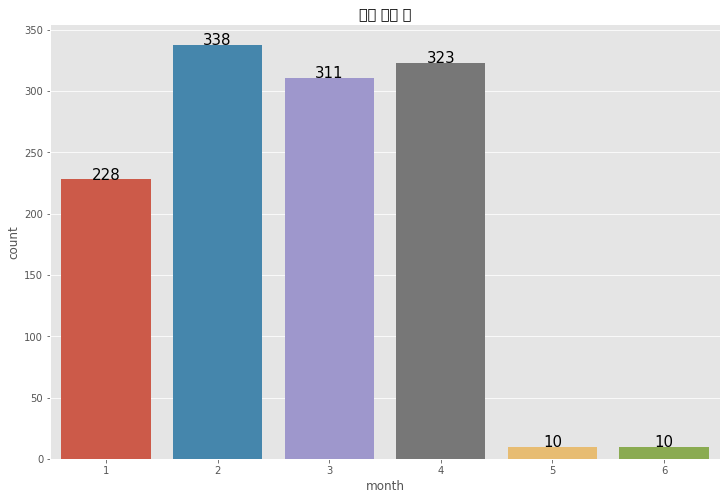

In [12]:
plt.style.use('ggplot')
plt.figure(figsize=(12,8))
ax = sns.countplot(data['month'])
plt.title('월별 기사 수')
i=0
for p in ax.patches:
    
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center",fontsize=15)

In [13]:
# data.to_excel('final.xlsx',index=False)

In [14]:
# data = pd.read_excel('final.xlsx')

In [15]:
set_font()
plt.figure(figsize=(12,8))
idx = data['dept'].value_counts().head(10).index
val = data['dept'].value_counts().head(10).values
g=sns.barplot(x=idx,y=val)

plt.title('가장 많이 나온 부서')
plt.xticks(rotation=60)
for i,j in zip(range(len(idx)),val): # 막대 높이 표시
    g.text(i,j,str(j), color='black', ha="center",fontsize=15)
# plt.savefig('how_many.png')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'c:/Windows/Fonts/malgun.ttf'

In [16]:
pvt = data.pivot_table(index='month',columns = 'dept',aggfunc='count') # 달 별 부서의 활동량

In [17]:
pvt = pvt['reg_date'].fillna(0)

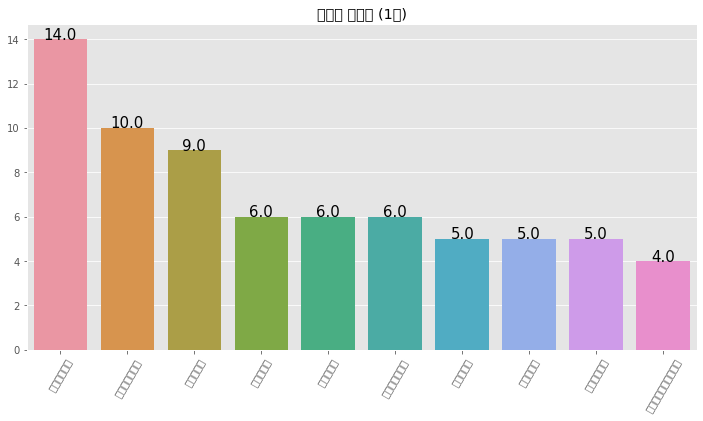

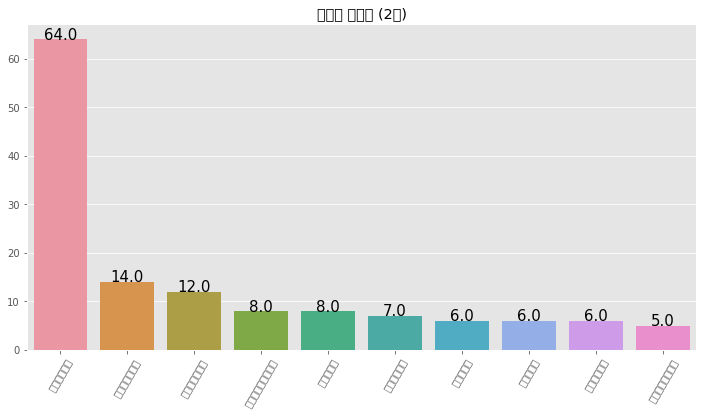

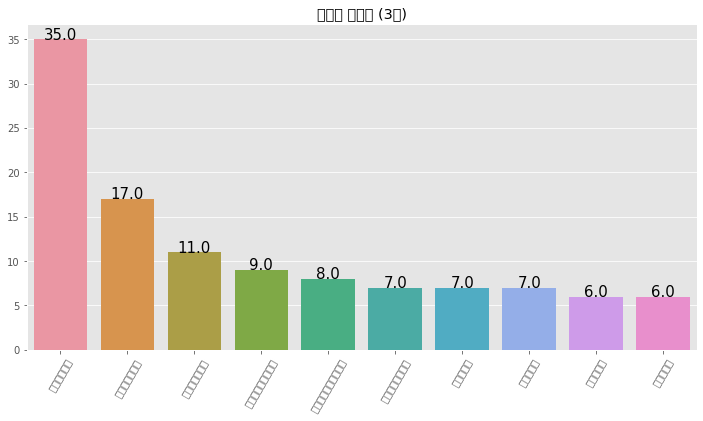

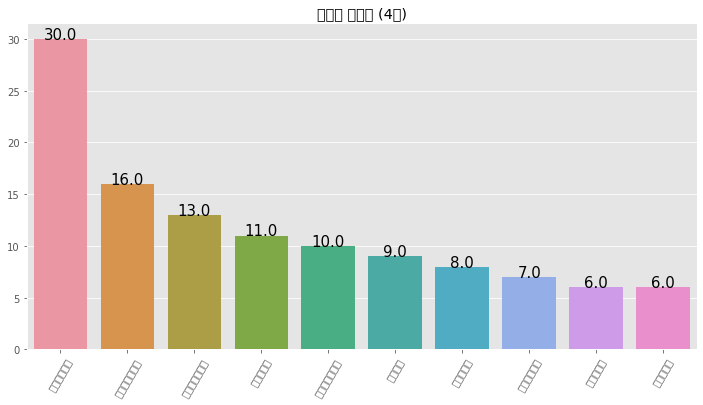

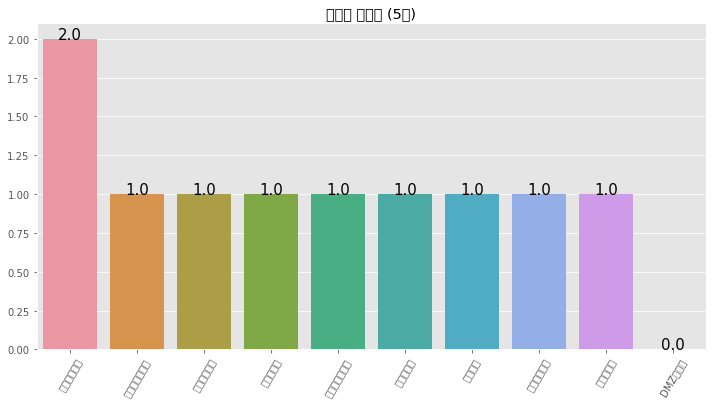

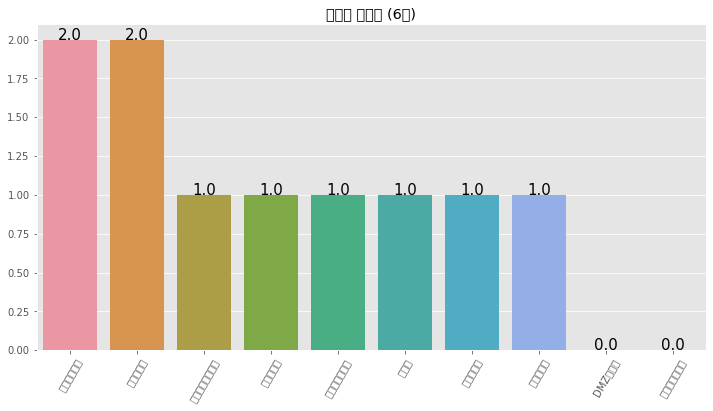

In [18]:
for i in range(6):
    plt.figure(figsize=(12,6))
    dic={}
    x= pvt.iloc[i].index
    y= pvt.iloc[i].values
    for j in range(len(x)):
        dic[x[j]] = y[j]
    idx = []
    val = []
    for k in range(10):
        idx.append(sorted(dic.items(),key=(lambda x: x[1]),reverse=True )[k][0])
        val.append(sorted(dic.items(),key=(lambda x: x[1]),reverse=True )[k][1])
    g= sns.barplot(x=idx,y=val)
    plt.title('부서별 활동량 ({}월)'.format(i+1))
    plt.xticks(rotation=60)
    for i,j in zip(range(len(idx)),val): # 막대 높이 표시
        g.text(i,j,str(j), color='black', ha="center",fontsize=15)
    

    
    plt.show()

In [19]:
# 조회수 상위 10
data.sort_values('view',ascending=False).head(10)[['title','view']]

,title,view
90,"(브리핑) 이재명, 4월부터 도민 1인당 10만 원씩 ‘경기도 재난기본소득’ 지급",306657.0
285,경기도 코로나19 발생 현황(2020.03.05) 10시,27413.0
265,경기도 코로나19 발생 현황(2020.03.07. 10시),27293.0
292,경기도 코로나19 발생 현황(2020.03.04) 10시,25419.0
273,경기도 코로나19 발생 현황(2020.03.06. 10시10분),24415.0
261,경기도 코로나19 발생 현황(2020.03.08. 10시),22685.0
14,경기도 코로나19 발생 현황(2020.02.29. 18시30분),22043.0
306,경기도 코로나19 발생 현황(2020.03.03) 10시,21064.0
251,경기도 코로나19 발생 현황(2020.03.09. 10시),19472.0
238,경기도 코로나19 발생 현황(2020.03.10. 10시),14493.0


In [21]:
!pip install JPype1
!pip install konlpy

from konlpy.tag import Okt, Kkma, Komoran, Hannanum
tagger = Okt()


# DataFrame -> List
title = list(data['title'])
# List -> String
title_st = ' '.join(title)
# 특수문자 제거
import re
body = []
punc = '[!"“”‘’#$%&\'()*+,-/:;<=>?[\\]^_`{|}…~·‥]'
body.append(re.sub(punc, '' , title_st))
full_body = ' '.join(body)
full_body

#형태소 분석
nouns = tagger.nouns(full_body)
from collections import Counter
count = Counter(nouns)
nouns_list = count.most_common(100)

#저장
import pandas as pd 
nouns_df = pd.DataFrame(nouns_list)
nouns_df.head()
# data.to_excel('빈도.xlsx') 

     |████████████████████████████████| 299 kB 815 kB/s eta 0:00:01
     |████████████████████████████████| 19.4 MB 4.7 MB/s eta 0:00:01
     |████████████████████████████████| 86 kB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 147 kB 5.3 MB/s eta 0:00:01
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.8.2
    Uninstalling beautifulsoup4-4.8.2:
      Successfully uninstalled beautifulsoup4-4.8.2


,0,1
0,경기도,651
1,도,264
2,코로나,225
3,현황,178
4,지원,142


In [23]:
!pip install plotly

     |████████████████████████████████| 11.5 MB 8.9 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11430 sha256=d796cdb0958e55c0667975984114f7d0ba4b7aaa9b87fa67f018277091dbd9db
  Stored in directory: /Users/yangdongjae/Library/Caches/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
nouns10 = 

In [24]:
import plotly.express as px

nouns10 = 

fig = px.pie(nouns10,
             values="count",
             names="word",
             title="Current state of patients",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="value+percent+label")
fig.show()

NameError: name 'nouns10' is not defined